### Loading Packages and Importing Data

In [ ]:
# load packages
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

import sklearn
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler,QuantileTransformer,RobustScaler,Normalizer,MaxAbsScaler,MinMaxScaler,PowerTransformer
from sklearn.datasets import load_iris


In [ ]:
data = load_iris()
df_features = pd.DataFrame(data.data)
df_features.columns = data.feature_names

df_target = pd.DataFrame({'target_original':data.target})
# create a partial target column
df_target['target_small_missinng'] = pd.DataFrame({'target_original':data.target})
df_target.loc[df_target.sample(frac=0.06, random_state=123).index, 'target_small_missinng'] = -1
df_target['target_large_missinng'] = pd.DataFrame({'target_original':data.target})
df_target.loc[df_target.sample(frac=0.6, random_state=123).index, 'target_large_missinng'] = -1
df_target['target_all_missinng'] = -1
target_order = [0,1,2,-1]
df = pd.concat([df_features, df_target], axis=1)

In [ ]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target_original,target_small_missinng,target_large_missinng,target_all_missinng
0,5.1,3.5,1.4,0.2,0,0,-1,-1
1,4.9,3.0,1.4,0.2,0,0,-1,-1
2,4.7,3.2,1.3,0.2,0,0,0,-1
3,4.6,3.1,1.5,0.2,0,0,0,-1
4,5.0,3.6,1.4,0.2,0,0,-1,-1


In [ ]:
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target_original,target_small_missinng,target_large_missinng,target_all_missinng
count,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.0
mean,5.843333,3.057333,3.758000,1.199333,1.000000,0.880000,-0.186667,-1.0
std,0.828066,0.435866,1.765298,0.762238,0.819232,0.926276,1.113593,0.0
min,4.300000,2.000000,1.000000,0.100000,0.000000,-1.000000,-1.000000,-1.0
25%,5.100000,2.800000,1.600000,0.300000,0.000000,0.000000,-1.000000,-1.0
50%,5.800000,3.000000,4.350000,1.300000,1.000000,1.000000,-1.000000,-1.0
75%,6.400000,3.300000,5.100000,1.800000,2.000000,2.000000,1.000000,-1.0
max,7.900000,4.400000,6.900000,2.500000,2.000000,2.000000,2.000000,-1.0


#EDA

In [ ]:
customer_palette = sns.color_palette('Set1', 3)
customer_palette.append(sns.xkcd_palette(['greyish'])[0])

plt.rc('figure', facecolor='y')

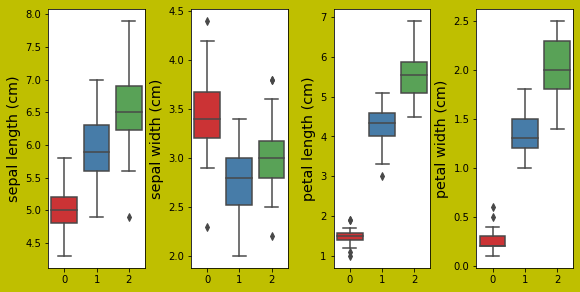

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=len(df_features.columns), figsize=(len(df_features.columns)*2,4))
for index, col in enumerate(df_features.columns):
    ax = axes[index]
#     plt.subplot(1,len(df_features.columns), index+1)
    sns.boxplot(y=df.loc[:,col], x=df.loc[:,'target_original'], palette=customer_palette, ax=ax)
    ax.set_ylabel(ax.get_ylabel(), fontsize='x-large')
#     ax.set_xlabel(ax.get_xlabel(), fontsize=20)
    ax.set_xlabel("")


plt.tight_layout(pad=0.5)
plt.show()

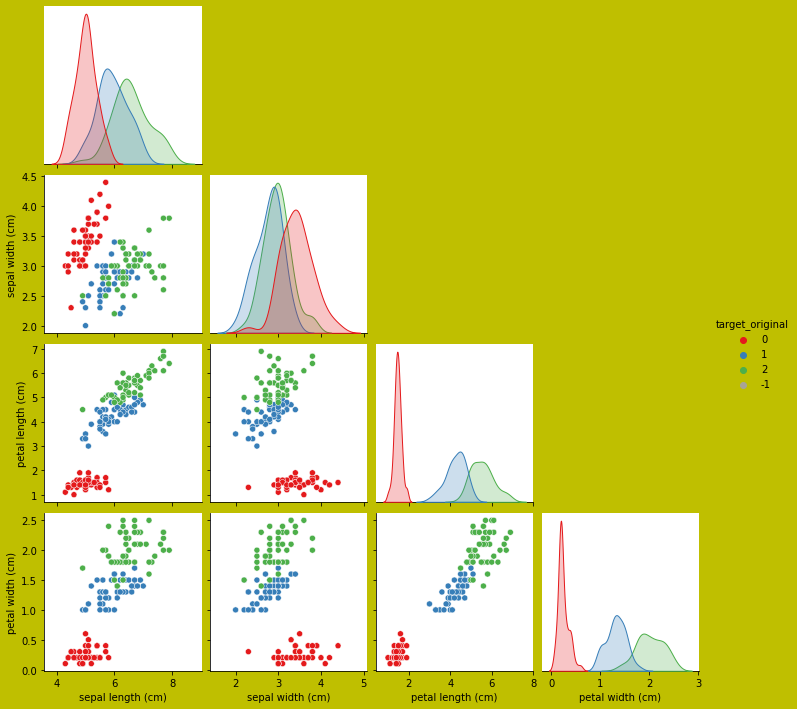

In [ ]:
g = sns.pairplot(data=df, vars=df_features.columns, hue='target_original',
                 corner=True, palette=customer_palette, hue_order=target_order)

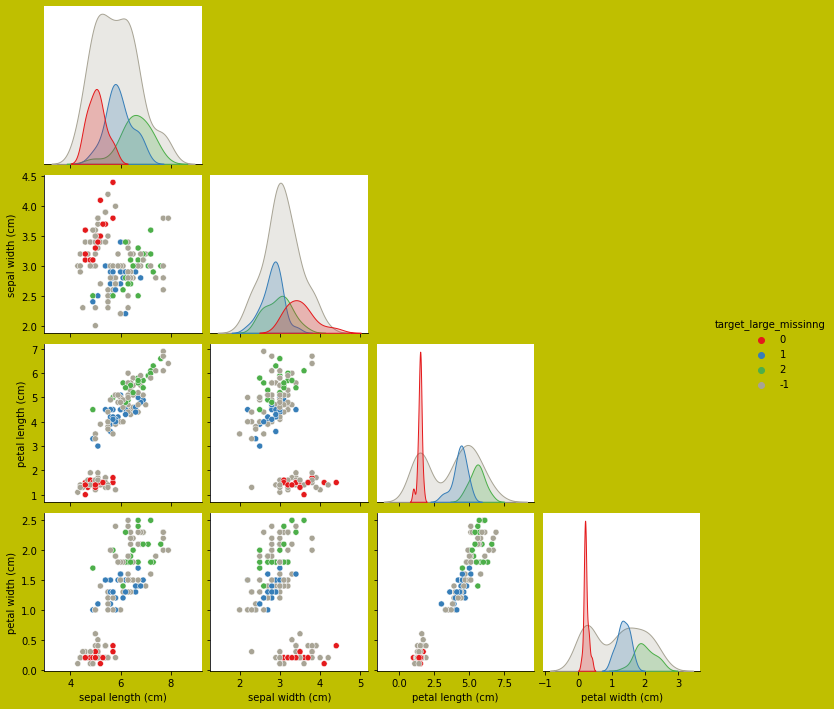

In [ ]:
g = sns.pairplot(data=df, vars=df_features.columns, hue='target_large_missinng', 
                 corner=True, palette=customer_palette, hue_order=target_order)

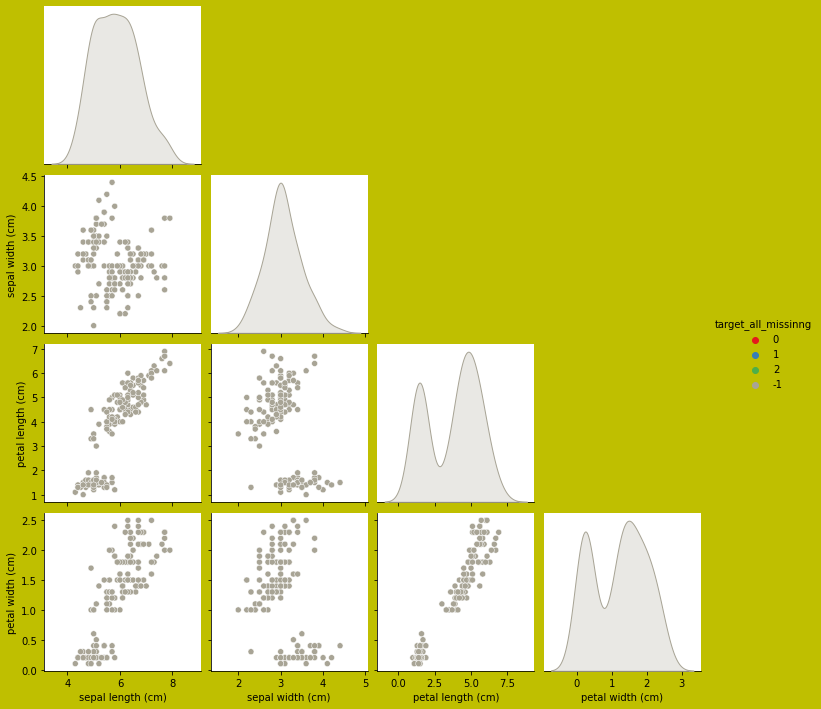

In [ ]:
g = sns.pairplot(data=df, vars=df_features.columns, hue='target_all_missinng', 
                 corner=True, palette=customer_palette, hue_order=target_order)

#Scalar Comparision

In [ ]:
def transformer_bundle(X_train, is_full_compare=True, is_get_instance=False):
    if is_full_compare:
        transformer_dict = {'StandardScaler': StandardScaler(), 
                            'QuantileTransformer':QuantileTransformer(), 
                            'RobustScaler':RobustScaler(), 
                            'Normalizer':Normalizer(), 
                            'MaxAbsScaler':MaxAbsScaler(), 
                            'MinMaxScaler':MinMaxScaler(), 
                            'PowerTransformer':PowerTransformer()}
    else:
        transformer_dict = {'StandardScaler': StandardScaler(), 
                            'QuantileTransformer':QuantileTransformer(), 
                            'PowerTransformer':PowerTransformer()}
    
    X_train_trans_dict = {trs:transformer_dict[trs].fit_transform(X_train) for trs in transformer_dict.keys()} 
    X_train_trans_dict['NoTransformer'] = X_train.values
    
    X_train_pca_dict = {trs:PCA().fit_transform(X_train_trans_dict[trs]) for trs in transformer_dict.keys()}
    X_train_pca_dict['NoTransformer'] = PCA().fit_transform(X_train)
    
    instance_pca_dict = {trs:PCA().fit(X_train_trans_dict[trs]) for trs in transformer_dict.keys()}
    instance_pca_dict['NoTransformer'] = PCA().fit(X_train)
    
    if not is_get_instance:
        return X_train_trans_dict, X_train_pca_dict
    else:
        return X_train_trans_dict, X_train_pca_dict, instance_pca_dict

In [ ]:
X_train = df_features.copy()
y_train = df_target

X_trans_dict, X_pca_dict,instance_pca_dict = transformer_bundle(X_train,is_get_instance=True)

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_data.py:2593: UserWarning: n_quantiles (1000) is greater than the total number of samples (150). n_quantiles is set to n_samples.
  "n_samples." % (self.n_quantiles, n_samples)


In [ ]:
def pca_scatter_plot(X_pca_dict, y, highlight_list=None):
    y = np.array(y)
    labels=['\nlabel few missing', '\nlabel half missing', '\nlabel all missing']
#     fig = plt.figure(figsize=(4*3,3*8), )
#     G = plt.GridSpec(nrows=len(X_pca_dict.keys()), ncols=3)
    fig, axes = plt.subplots(nrows=len(X_pca_dict.keys()), ncols=3, figsize=(4*3,3*len(X_pca_dict.keys())), sharey='row')
    for i in range(len(X_pca_dict.keys())):
        # the fancy modulo is just to make the "no transformation" come first...
        ind = (i-1)%len(X_pca_dict)
        trs = list(X_pca_dict.keys())[ind]
        X = X_pca_dict[trs]
        
        # if there are some dots to be highlighted..        
        if highlight_list is not None:
            style_list = np.array(['original']*X.shape[0])
            style_list[highlight_list] = 'syn_oli'
        else:
            style_list=None
            
        for j in range(3):
#             this_ax = fig.add_subplot(G[i, j], sharey='row')
            this_ax = axes[i,j]
            # plot the first 2 components
            sns.scatterplot(data=None, x=X[:,0], y=X[:,1], 
                            hue=y[:,j], hue_order=[0,1,2,-1], 
                            style=style_list, 
                            alpha=0.6, palette=customer_palette, ax=this_ax)
            
            
            # set axis labels and title
            this_ax.set_xlabel('First component')
            this_ax.set_ylabel('Second component')
            this_ax.set_title(trs+labels[j], loc='left', fontsize='large')
            this_ax.legend(loc=2)
    plt.tight_layout(pad=0.5, )
    plt.show()

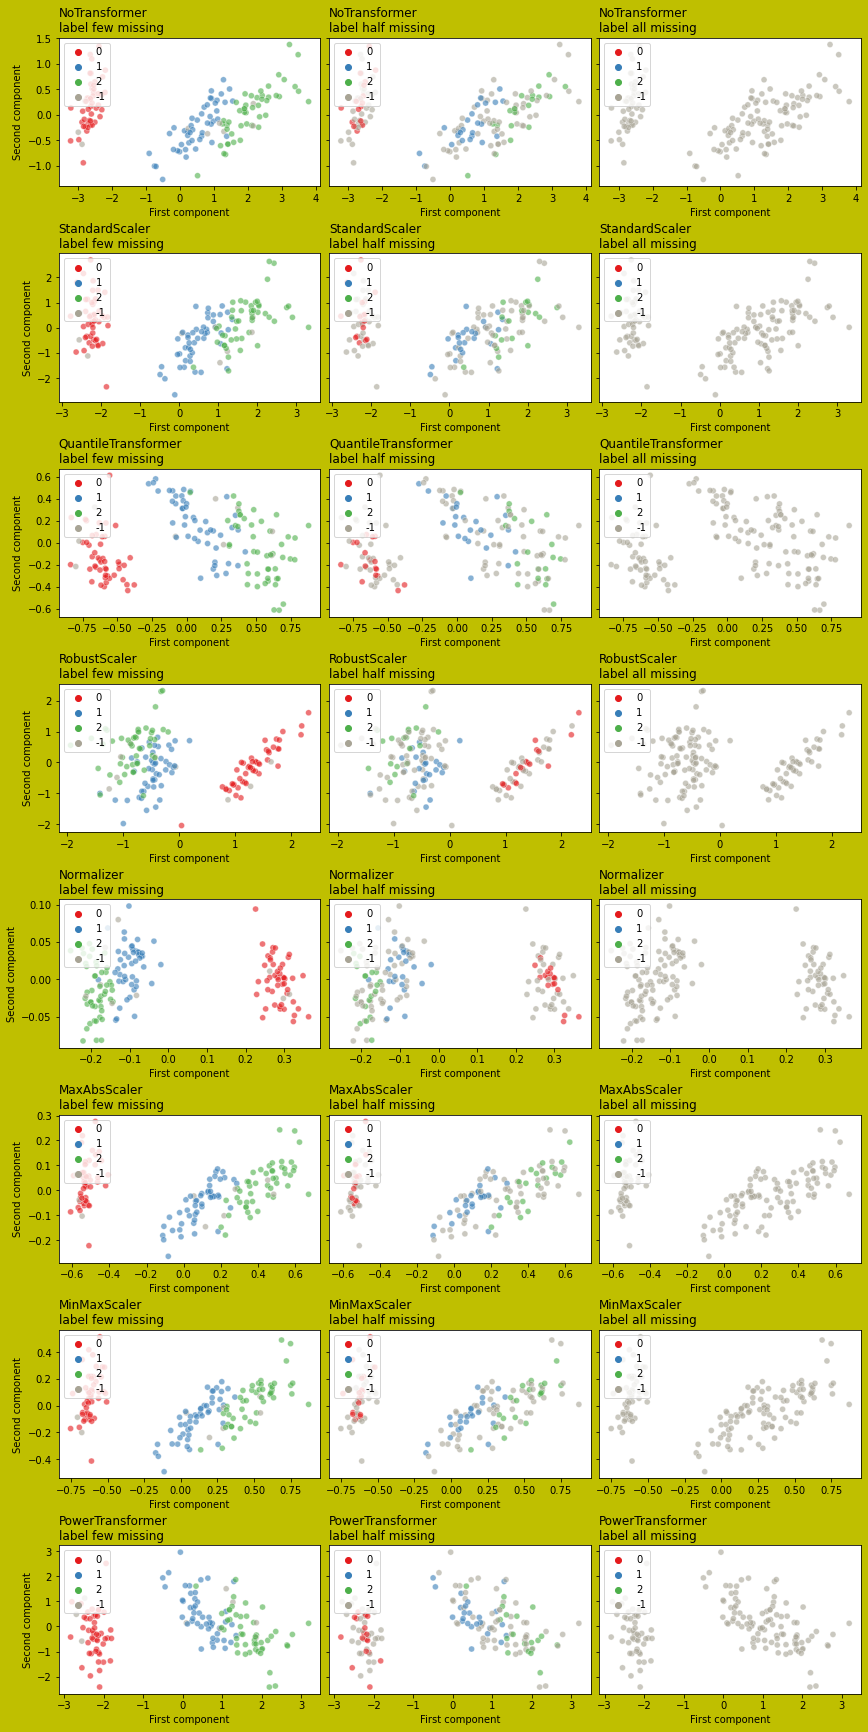

In [ ]:
pca_scatter_plot(X_pca_dict, y_train.iloc[:,1:])

In [ ]:
def pca_box_plot(X_pca_dict, y):
    y = np.array(y)
    ncols = list(X_pca_dict.values())[0].shape[1]
    nrows=len(X_pca_dict)
    
    fig,ax = plt.subplots(nrows=nrows, ncols=ncols, sharey='row', figsize=(2*ncols,4*nrows))
    for i in range(len(X_pca_dict.keys())):
        ind = (i-1)%len(X_pca_dict)
        trs = list(X_pca_dict.keys())[ind]
        X = X_pca_dict[trs]
        
        for j in range(ncols):
            this_ax = ax[i,j]
            sns.boxplot(y=X[:,j], x=y, palette=customer_palette, ax=this_ax)
            this_ax.set_ylabel('Component No.%d' % j)
            if j == 0:
                this_ax.set_title(trs, loc='left', fontsize='x-large')                

    plt.tight_layout(0.5)   
    plt.show()
    


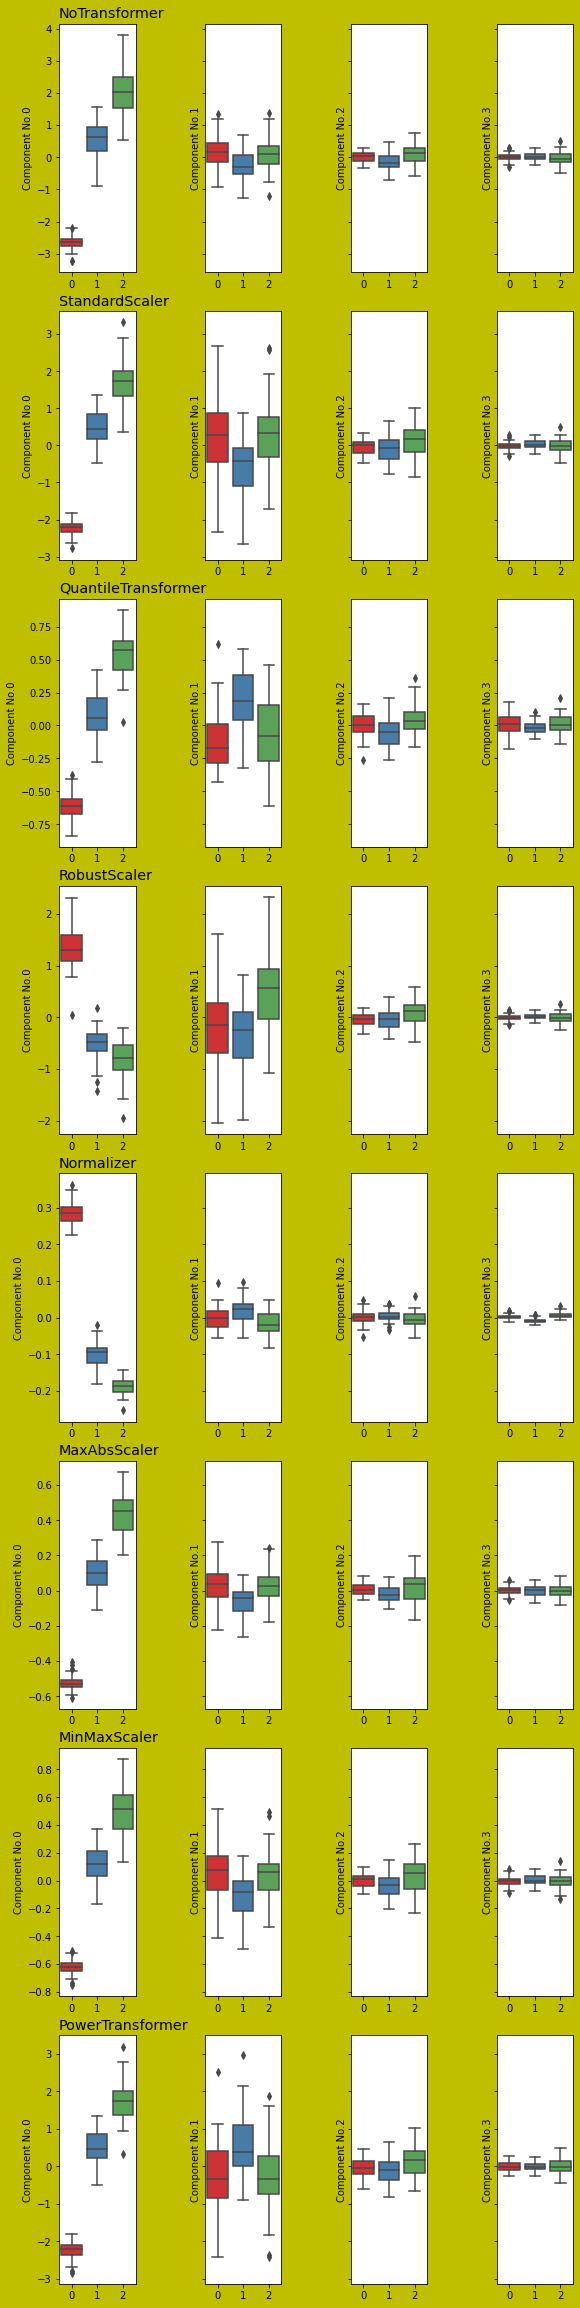

In [ ]:
pca_box_plot(X_pca_dict, df_target.loc[:,'target_original'])

In [ ]:
def trans_heat_plot_abs(X_trans_dict, y_axis_labels):
    fig,ax = plt.subplots(nrows=len(X_trans_dict.keys()), ncols=1, sharey=True, figsize=(6,3*len(X_trans_dict.keys())))
    for i in range(len(X_trans_dict.keys())):
        ind = (i-1)%len(X_trans_dict)
        trs = list(X_trans_dict.keys())[ind]
        X = X_trans_dict[trs]
        y_axis_labels = df_features.columns  
        this_ax = ax[i]
        covmtrx = (np.cov(X.T))
        mask = np.triu(covmtrx,1)
        sns.heatmap(covmtrx, 
                    square=True,
                    mask = mask,
                    yticklabels=y_axis_labels,
                    center= 0,
                    cmap=(sns.color_palette('RdBu_r',256)), #, 10
                    ax=this_ax,
           )
        this_ax.set_title(trs+str('(cov matrix)'),loc='left', fontsize='x-large')
        this_ax.set_xticklabels(this_ax.get_xticklabels(), rotation=0)
        
    plt.tight_layout()        
    plt.show()

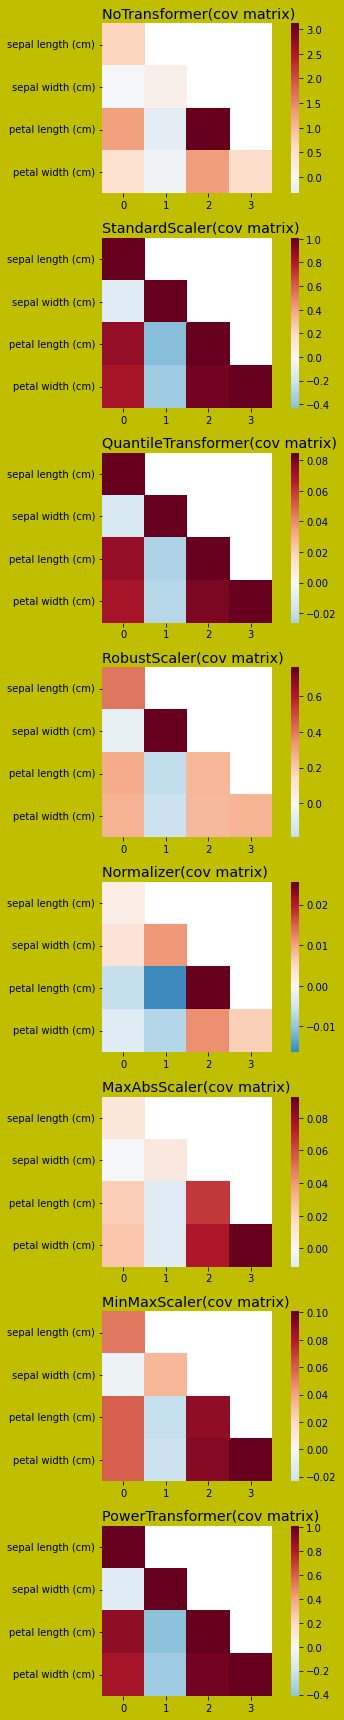

In [ ]:
trans_heat_plot_abs(X_trans_dict, y_axis_labels=df_features.columns)

In [ ]:
def pca_plot_cumsum(instance_pca_dict):


    trans_list_tmp = list(instance_pca_dict.keys())[-1:]+ list(instance_pca_dict.keys())[:-1]
    cumsum_list = [np.concatenate([[0],instance_pca_dict[trans].explained_variance_ratio_.cumsum()]) for trans in trans_list_tmp]
    
    df_cumsum = pd.DataFrame(np.array(cumsum_list).T)
    df_cumsum.columns = trans_list_tmp

    fig, ax = plt.subplots(1,1,figsize=(12,6), sharex=True, sharey=True)
    
    df_cumsum.plot(ax=ax, color=sns.color_palette('Accent'), kind='line', marker='o')
    ax.grid()
    ax.legend(loc='lower right')
    ax.set_ylabel('explained_variance_cumsum')
    ax.set_xlabel('PCA components')
    ax.set_xlim([0,len(cumsum_list[0])-0.5])
    ax.set_ylim([0,1.05])
    plt.show()
    

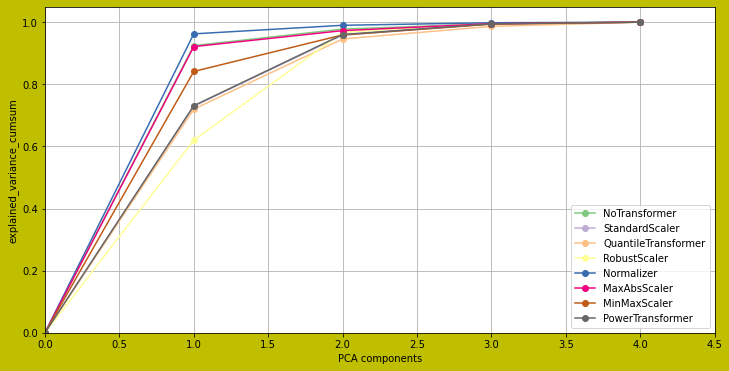

In [ ]:
pca_plot_cumsum(instance_pca_dict)

#Testing differnet Scaling using Clustering

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score, v_measure_score

kmeans = KMeans(n_clusters=3, random_state=123)
scores0,scores1,scores2 = [],[],[]
for trs in X_pca_dict.keys():
    X_trs = X_trans_dict[trs]
    X_PCA = X_pca_dict[trs]
        
    pred0 = kmeans.fit_predict(X_trs[:,-2:]) # we took the last two features because visually these two have shown the pattern rather clearly (cf the pairplot)
    scores0.append(v_measure_score(labels_true=y_train.target_original.values, labels_pred=pred0))
    pred1 = kmeans.fit_predict(X_PCA[:,:2])
    scores1.append(v_measure_score(labels_true=y_train.target_original.values, labels_pred=pred1))
    pred2 = kmeans.fit_predict(X_PCA)
    scores2.append(v_measure_score(labels_true=y_train.target_original.values, labels_pred=pred2))
    
df_scores = pd.DataFrame(np.array([scores0, scores1, scores2]).T, 
                         columns=['orig_2Features', 'PCA_2Features', 'allFeatures'],
                         index=X_pca_dict.keys()
                         )

In [ ]:
df_scores

,orig_2Features,PCA_2Features,allFeatures
StandardScaler,0.864186,0.647874,0.659487
QuantileTransformer,0.880111,0.650430,0.650430
RobustScaler,0.864186,0.616221,0.616221
Normalizer,0.899694,0.899694,0.899694
MaxAbsScaler,0.864186,0.864186,0.864186
MinMaxScaler,0.864186,0.741912,0.741912
PowerTransformer,0.864186,0.672844,0.672844
NoTransformer,0.864186,0.741912,0.758176


In [ ]:
def pca_cluster_contour_plot(X_pca_dict, labels, kmeans):
    fig, axes = plt.subplots(nrows=len(X_pca_dict.keys()), ncols=1,figsize=(8*1,6*len(X_pca_dict.keys())))
    for i in range(len(X_pca_dict.keys())):

        ind = (i-1)%len(X_pca_dict)
        trs = list(X_pca_dict.keys())[ind]
        X = X_pca_dict[trs]

        pred = kmeans.fit_predict(X[:,:2])    
        

        df_tmp = pd.concat([pd.DataFrame(X), labels.target_original, pd.DataFrame({'pred':pred})],axis = 1)
        df_tmp['pred'] = np.choose(pred,
                                   [df_tmp[df_tmp.pred==0].target_original.mode().values,
                                    df_tmp[df_tmp.pred==1].target_original.mode().values,
                                    df_tmp[df_tmp.pred==2].target_original.mode().values]).astype(np.int64)        

        ax = axes[i]
        for i in range(3):
            sns.kdeplot(data=df_tmp.iloc[:,0][df_tmp.pred==i], data2=df_tmp.iloc[:,1][df_tmp.pred==i],
                        shade=True,
                        color=sns.color_palette('Set1', desat=0.5)[i],
                        shade_lowest=False,
                        label='pred_'+str(i),
                        alpha=0.5,
                        ax=ax)
                   
        sns.scatterplot(x=df_tmp[df_tmp.target_original!=df_tmp.pred].iloc[:,0], 
                        y=df_tmp[df_tmp.target_original!=df_tmp.pred].iloc[:,1], 
                        color = 'orange',
                        marker= 'X',
                        s=150,
                        ax=ax, label='mismatch')

        sns.scatterplot(data=df_tmp, x=df_tmp.columns[0], y=df_tmp.columns[1], hue='target_original', palette='Set1',ax=ax, )
        ax.set_title(trs+'\nmismatch: {} (out of {})'.format(len(df_tmp[df_tmp.target_original!=df_tmp.pred]), len(df_tmp)),
                     loc='left', fontsize='x-large')
        ax.set_xlabel("1st PCA component")
        ax.set_ylabel("2nd PCA component")
        ax.legend(bbox_to_anchor=(1.01, 1.0), loc='upper left')
    plt.tight_layout()
    plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:1681: FutureWarning: Use `x` and `y` rather than `data` `and `data2`
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:1718: UserWarning: `shade_lowest` is now deprecated in favor of `thresh`. Setting `thresh=0.05`, but please update your code.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:1681: FutureWarning: Use `x` and `y` rather than `data` `and `data2`
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:1718: UserWarning: `shade_lowest` is now deprecated in favor of `thresh`. Setting `thresh=0.05`, but please update your code.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:1681: FutureWarning: Use `x` and `y` rather than `data` `and `data2`
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seabor

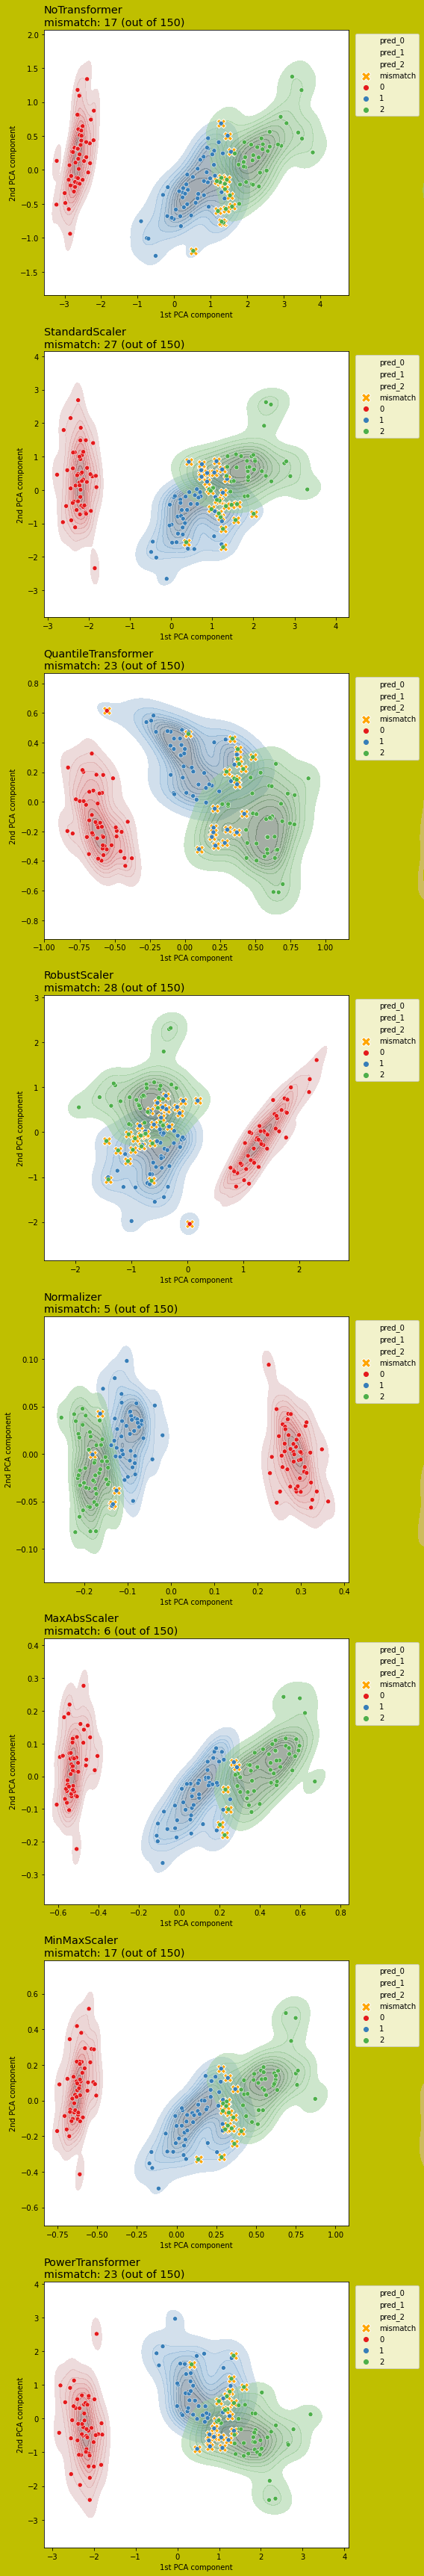

In [ ]:
kmeans = KMeans(n_clusters=3, random_state=123)

pca_cluster_contour_plot(X_pca_dict,y_train, kmeans)